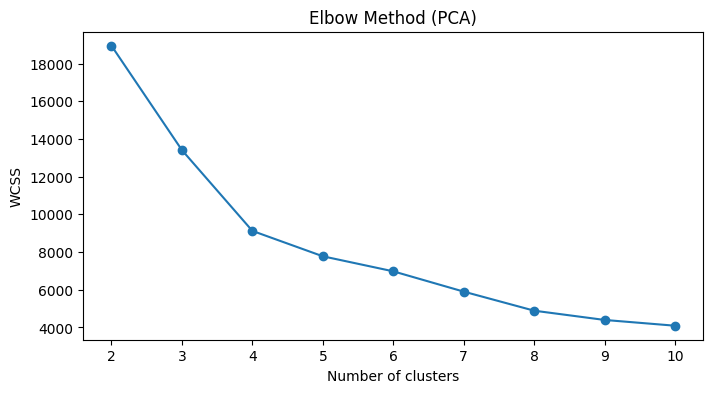

Optimal clusters (Elbow/Knee method): 4
Clusters=2, Silhouette Score=0.399
Clusters=3, Silhouette Score=0.395
Clusters=4, Silhouette Score=0.436
Clusters=5, Silhouette Score=0.432
Clusters=6, Silhouette Score=0.420
Clusters=7, Silhouette Score=0.405
Clusters=8, Silhouette Score=0.394
Clusters=9, Silhouette Score=0.367
Clusters=10, Silhouette Score=0.362


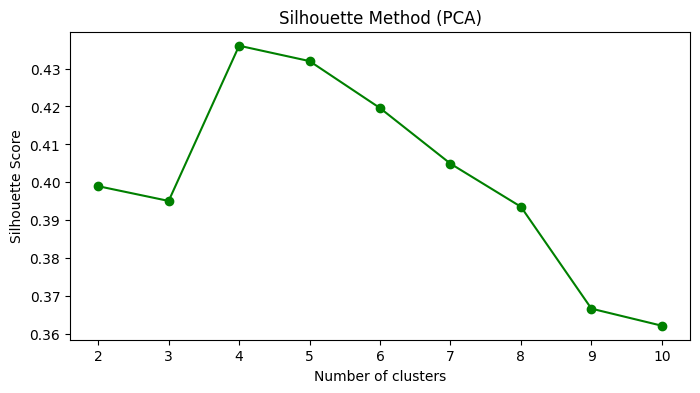

Optimal clusters (Silhouette method): 4


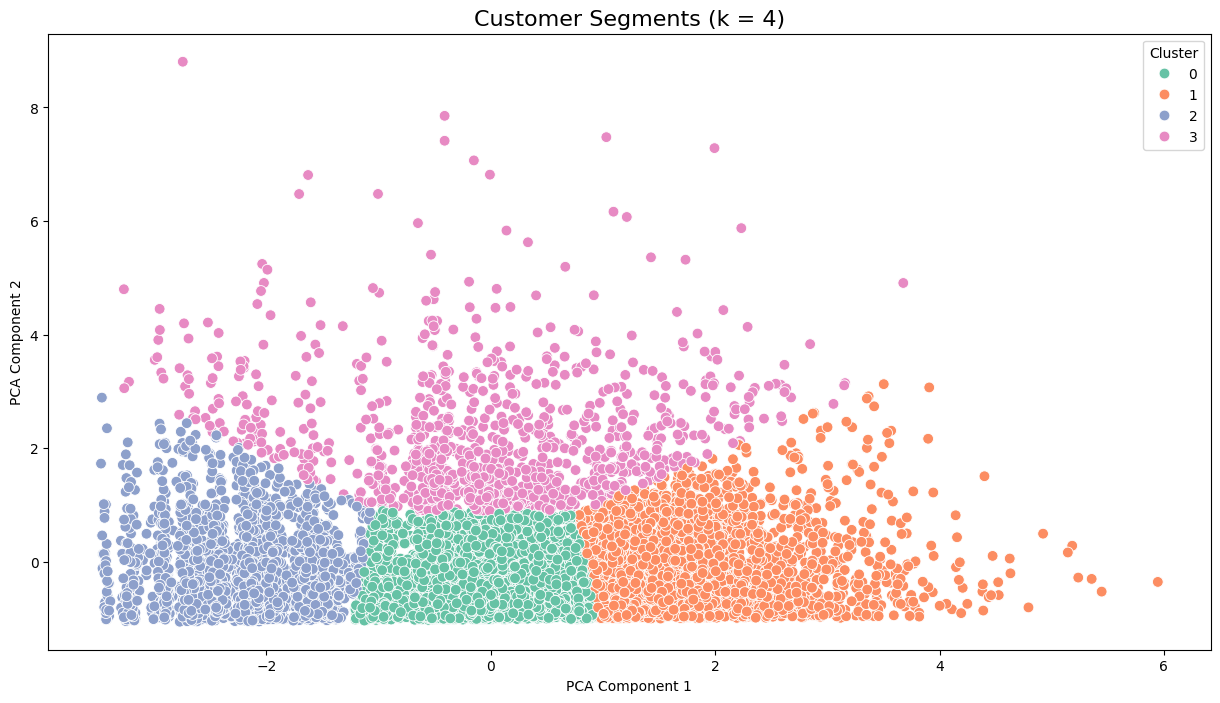

In [13]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from kneed import KneeLocator
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Load dataset
df = pd.read_csv('Customer.csv')

# Features
features = ['IncomeLevel', 'PurchaseFrequency', 'RecencyDays', 
            'LifetimeSpend', 'SatisfactionScore', 'Region']
df_selected = df[features]

# Encoding categorical variables
df_encoded = pd.get_dummies(df_selected, drop_first=True)

# Standardizing numerical columns
num_cols = ['PurchaseFrequency', 'RecencyDays', 'LifetimeSpend', 'SatisfactionScore']
scaler = StandardScaler()
df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])
x_scaler = df_encoded.values

# PCA to 2 components
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_scaler)

# Elbow method
wcss = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x_pca)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(range(2, 11), wcss, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method (PCA)')
plt.show()

# KneeLocator for optimal k
knee = KneeLocator(range(2, 11), wcss, curve='convex', direction='decreasing')
print(f"Optimal clusters (Elbow/Knee method): {knee.elbow}")

# Silhouette method
sil_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(x_pca)
    score = silhouette_score(x_pca, labels)
    sil_scores.append(score)
    print(f"Clusters={k}, Silhouette Score={score:.3f}")

plt.figure(figsize=(8, 4))
plt.plot(range(2, 11), sil_scores, marker='o', color='green')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method (PCA)')
plt.show()

# Best k from silhouette
best_k = range(2, 11)[sil_scores.index(max(sil_scores))]
print(f"Optimal clusters (Silhouette method): {best_k}")

# Final KMeans with k=4 (or use best_k)
kmeans_final = KMeans(n_clusters=4, random_state=42)
labels_final = kmeans_final.fit_predict(x_pca)

# Create DataFrame for plotting
pca_df = pd.DataFrame({
    'PCA1': x_pca[:, 0],
    'PCA2': x_pca[:, 1],
    'Cluster': labels_final
})

# Plot clusters like your screenshot
plt.figure(figsize=(15, 8))
sns.scatterplot(
    data=pca_df, 
    x='PCA1', y='PCA2', 
    hue='Cluster', 
    palette='Set2', 
    s=60, 
    edgecolor='white'
)
plt.title('Customer Segments (k = 4)', fontsize=16)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()


In [11]:
df['Cluster'] = labels_final
# Profile clusters to see their characteristics
cluster_profile = df.groupby('Cluster').agg({
    'PurchaseFrequency': 'mean',
    'RecencyDays': 'mean',
    'LifetimeSpend': 'mean',
    'SatisfactionScore': 'mean',
    'IncomeLevel': lambda x: x.mode()[0],  # most common income level
    'Region': lambda x: x.mode()[0]        # most common region
}).reset_index()

print(cluster_profile)


   Cluster  PurchaseFrequency  RecencyDays  LifetimeSpend  SatisfactionScore  \
0        0           4.363863    58.206638     232.547375           3.739706   
1        1           6.540743    73.290922     424.527745           4.641887   
2        2           2.049371    76.707965      98.234830           2.108524   
3        3           4.451336   277.394084     246.161441           3.757634   

  IncomeLevel          Region  
0      Medium  Central Europe  
1      Medium  Central Europe  
2         Low  Central Europe  
3      Medium  Eastern Europe  
